In [2]:
pip install labelme

In [3]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import time
import uuid
import cv2

In [35]:
IMAGES_PATH = os.path.join('Facedet','data','images')
number_images = 30

In [8]:
# cap = cv2.videoCapture(0)
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imagename = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpeg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)
    
#     if cv2.waitkey(1) & 0xFF == ord('q'):
#         break
        
# cap.relsease()
# cv2.destroyALLWindows()

In [9]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [10]:
# !labelme

In [11]:
# pip install numpy==1.22.0

Note: you may need to restart the kernel to use updated packages.


In [60]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [61]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [62]:
tf.config.list_physical_devices('GPU')

[]

In [63]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [64]:
images.as_numpy_iterator().next()

b'data\\images\\73f45d93-471f-11ee-845f-0068eb7c8495.jpg'

In [65]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [66]:
images = images.map(load_image)

In [67]:
images.as_numpy_iterator().next()

array([[[141, 177, 213],
        [141, 177, 213],
        [143, 177, 212],
        ...,
        [218, 232, 235],
        [221, 232, 236],
        [222, 233, 235]],

       [[140, 176, 212],
        [140, 176, 210],
        [142, 176, 211],
        ...,
        [219, 232, 238],
        [221, 232, 236],
        [221, 232, 236]],

       [[139, 175, 209],
        [140, 176, 208],
        [142, 177, 209],
        ...,
        [216, 231, 238],
        [219, 232, 240],
        [218, 231, 237]],

       ...,

       [[ 78, 102, 114],
        [ 79, 103, 115],
        [ 80, 104, 114],
        ...,
        [ 17,  10,  28],
        [ 17,  10,  26],
        [ 16,   9,  25]],

       [[ 80, 104, 116],
        [ 81, 105, 117],
        [ 81, 103, 114],
        ...,
        [ 18,   9,  28],
        [ 18,   9,  26],
        [ 17,   8,  25]],

       [[ 80, 104, 116],
        [ 80, 104, 116],
        [ 80, 102, 113],
        ...,
        [ 18,   9,  28],
        [ 17,   8,  25],
        [ 16,   7,  24]]

In [68]:
image_generator = images.batch(4).as_numpy_iterator()

In [69]:
plot_images = image_generator.next()

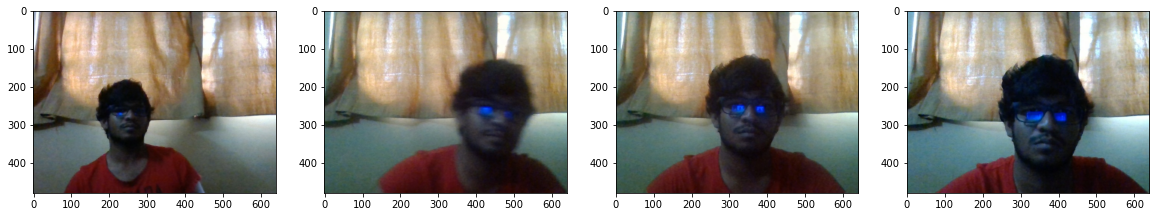

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [71]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [72]:
import albumentations as alb

In [73]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

In [74]:
img = cv2.imread(os.path.join('data','train','images','25e0d019-471f-11ee-9ea0-0068eb7c8495.jpg'))

In [75]:
with open(os.path.join('data','train','labels','25e0d019-471f-11ee-9ea0-0068eb7c8495.json'),'r') as f:
    label = json.load(f)

In [76]:
label['shapes'][0]['points']

[[235.44715447154476, 112.35772357723577],
 [440.32520325203257, 377.3983739837398]]

In [77]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [78]:
coords

[235.44715447154476, 112.35772357723577, 440.32520325203257, 377.3983739837398]

In [79]:
coords = list(np.divide(coords,[640,480,640,480]))

In [80]:
coords

[0.3678861788617887,
 0.23407859078590787,
 0.6880081300813009,
 0.7862466124661246]

In [81]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [82]:
augmented['bboxes'][0][2:]

(0.7985004516711834, 0.791996386630533)

In [83]:
augmented['bboxes']

[(0.343215898825655,
  0.20301716350496837,
  0.7985004516711834,
  0.791996386630533)]

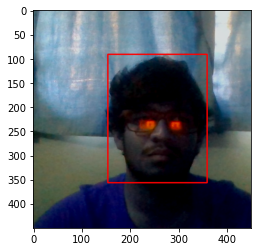

In [84]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
                      (255,0,0),2)

plt.imshow(augmented['image'])

In [85]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data',partition,'images')):
        img = cv2.imread(os.path.join('data',partition,'images',image))
        
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
            
        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [86]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [87]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [88]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [89]:
train_images.as_numpy_iterator().next()

array([[[0.38088235, 0.1622549 , 0.18333334],
        [0.3877451 , 0.16421568, 0.1877451 ],
        [0.38664216, 0.16017157, 0.18370098],
        ...,
        [0.41452205, 0.43805146, 0.4223652 ],
        [0.39528185, 0.4291054 , 0.41427696],
        [0.3797794 , 0.42628676, 0.4067402 ]],

       [[0.39136028, 0.16636029, 0.19430147],
        [0.4052696 , 0.1694853 , 0.20085785],
        [0.3961397 , 0.16035539, 0.19172794],
        ...,
        [0.43572304, 0.46317402, 0.43523285],
        [0.4208946 , 0.45882353, 0.42781863],
        [0.4088848 , 0.45055148, 0.41917893]],

       [[0.41629902, 0.17708333, 0.20845588],
        [0.42555147, 0.1853554 , 0.21819852],
        [0.39950982, 0.15245098, 0.19558823],
        ...,
        [0.4357843 , 0.475     , 0.43186274],
        [0.43529412, 0.4779412 , 0.45251226],
        [0.4143995 , 0.45753676, 0.43400735]],

       ...,

       [[0.9039828 , 0.83094364, 0.8324142 ],
        [0.9351103 , 0.8727941 , 0.9158701 ],
        [0.98645836, 0

In [90]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [91]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [92]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [93]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [94]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1294, 0.166 , 0.63  , 0.755 ], dtype=float16))

In [95]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(5160, 5160, 1620, 1620, 1560, 1560)

In [96]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [97]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [98]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [99]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.7666 , 0.2262 , 1.     , 0.6274 ],
        [0.5283 , 0.2087 , 1.     , 0.785  ],
        [0.     , 0.     , 0.6235 , 0.88   ],
        [0.312  , 0.01512, 0.903  , 0.723  ],
        [0.2761 , 0.1571 , 0.759  , 0.6953 ],
        [0.     , 0.075  , 0.7075 , 0.991  ],
        [0.     , 0.1713 , 0.4219 , 0.8525 ],
        [0.2323 , 0.397  , 0.547  , 0.7783 ]], dtype=float16))

In [100]:
data_samples = train.as_numpy_iterator()

In [101]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


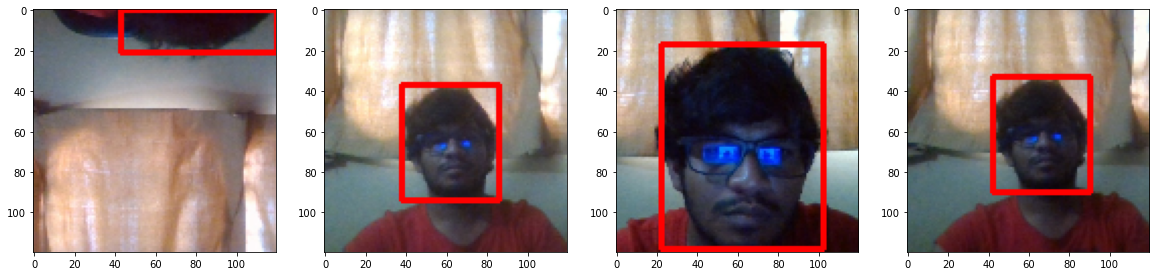

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [103]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [104]:
vgg = VGG16(include_top=False)

In [105]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [106]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [107]:
facetracker = build_model()

In [108]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_5[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [109]:
X, y = train.as_numpy_iterator().next()

In [110]:
X.shape

(8, 120, 120, 3)

In [111]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 784ms/step


In [112]:
classes, coords

(array([[0.46327943],
        [0.41071773],
        [0.4627891 ],
        [0.5222462 ],
        [0.4384561 ],
        [0.47497132],
        [0.47345814],
        [0.44274792]], dtype=float32),
 array([[0.54037434, 0.58052737, 0.44227478, 0.68413985],
        [0.4885752 , 0.4702299 , 0.39360446, 0.6562008 ],
        [0.5007082 , 0.5511233 , 0.42721316, 0.5921737 ],
        [0.4072082 , 0.34172958, 0.40343168, 0.69442534],
        [0.45273268, 0.5973893 , 0.43951884, 0.60499495],
        [0.45682356, 0.4811799 , 0.46581465, 0.6569919 ],
        [0.46908852, 0.6441524 , 0.38795915, 0.64326936],
        [0.49639568, 0.61920625, 0.47595695, 0.601174  ]], dtype=float32))

In [115]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [119]:
from tensorflow.keras.optimizers.legacy import Adam

In [121]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [122]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [123]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [124]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0528874>

In [125]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7763519>

In [126]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0528874>

In [127]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [128]:
model = FaceTracker(facetracker)

In [129]:
model.compile(opt, classloss, regressloss)

In [130]:
logdir='logs'

In [131]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [132]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
645/645 [==============================] - 1489s 2s/step - total_loss: 0.2231 - class_loss: 0.0464 - regress_loss: 0.1999 - val_total_loss: 0.0350 - val_class_loss: 2.6457e-04 - val_regress_loss: 0.0348
Epoch 2/10
645/645 [==============================] - 1793s 3s/step - total_loss: 0.0796 - class_loss: 0.0180 - regress_loss: 0.0706 - val_total_loss: 0.0235 - val_class_loss: 1.8845e-04 - val_regress_loss: 0.0234
Epoch 3/10
645/645 [==============================] - 1635s 3s/step - total_loss: 0.0430 - class_loss: 0.0111 - regress_loss: 0.0374 - val_total_loss: 0.0144 - val_class_loss: 1.5284e-04 - val_regress_loss: 0.0143
Epoch 4/10
645/645 [==============================] - 1896s 3s/step - total_loss: 0.0364 - class_loss: 0.0090 - regress_loss: 0.0319 - val_total_loss: 0.0080 - val_class_loss: 1.1560e-04 - val_regress_loss: 0.0079
Epoch 5/10
645/645 [==============================] - 1820s 3s/step - total_loss: 0.0280 - class_loss: 0.0070 - regress_loss: 0.0245 - val_total

In [133]:
hist.history

{'total_loss': [0.024816494435071945,
  0.014829627238214016,
  0.007565057370811701,
  0.009588070213794708,
  0.01149716880172491,
  0.006219794042408466,
  0.0213156808167696,
  0.00807540025562048,
  0.006826219614595175,
  0.008103705942630768],
 'class_loss': [6.834430678281933e-05,
  0.00023577953106723726,
  4.392378468764946e-05,
  0.00012164301733719185,
  0.00011039929086109623,
  5.798485653940588e-05,
  0.0039871432818472385,
  3.650798362286878e-06,
  2.0780249542440288e-05,
  6.4969967752404045e-06],
 'regress_loss': [0.024782322347164154,
  0.014711737632751465,
  0.007543095387518406,
  0.009527248330414295,
  0.011441969312727451,
  0.006190801504999399,
  0.01932210847735405,
  0.008073574863374233,
  0.006815829314291477,
  0.008100457489490509],
 'val_total_loss': [0.03496158495545387,
  0.023499621078372,
  0.01436784490942955,
  0.00798647478222847,
  0.017086513340473175,
  0.0071858069859445095,
  0.012048508040606976,
  0.004238984081894159,
  0.00572501868009

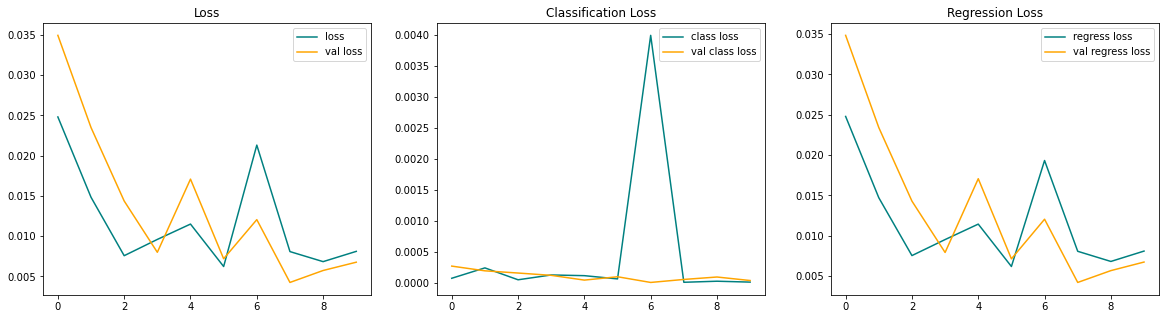

In [134]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [135]:
test_data = test.as_numpy_iterator()

In [136]:
test_sample = test_data.next()

In [137]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


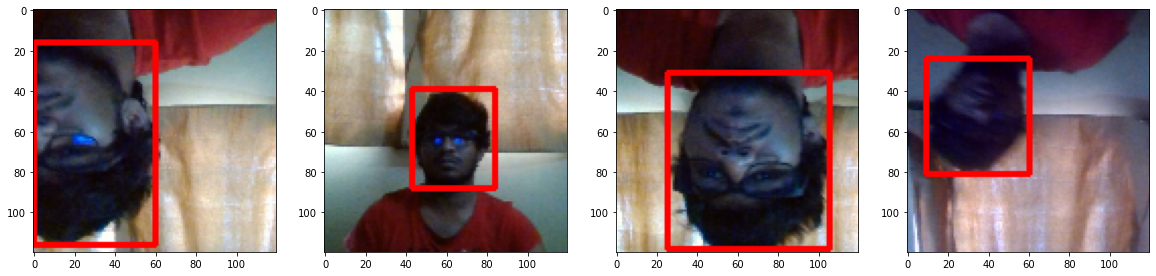

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [139]:
from tensorflow.keras.models import load_model

In [140]:
facetracker.save('facetracker.h5')

C:\Users\chamo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [141]:
facetracker = load_model('facetracker.h5')

In [143]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 134ms/step


KeyboardInterrupt: 